Find the linear regression equation for this data.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?



In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

In [48]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [3]:
df.shape

(15, 2)

In [5]:
df.describe()

,Chirps/Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.isnull().sum()

Chirps/Second         0
Ground_Temperature    0
dtype: int64

In [49]:
df=df.drop_duplicates()
df

,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


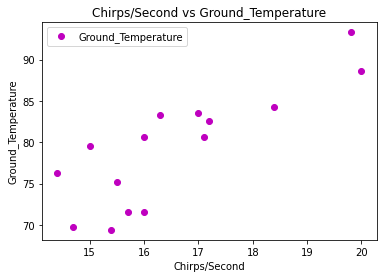

In [50]:
df.plot(x='Chirps/Second', y='Ground_Temperature', style='o',color='m')
plt.title('Chirps/Second vs Ground_Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground_Temperature')
plt.show()

In [51]:
#TO CHECK THE LINEARITY
df.corr()

,Chirps/Second,Ground_Temperature
Chirps/Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [52]:
#0.8  IS A GOOD CORRELATION FACTOR
df.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
#According to the question, we need to find the chriping rate so we have to fix feature as ground temperature and target variable as chirping rate


In [53]:
x = df.loc[:, ['Ground_Temperature']].values
y = df.loc[:, 'Chirps/Second'].values 

print(x.shape)


print(y.shape)

(15, 1)
(15,)


In [41]:
linreg = linear_model.LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [21]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


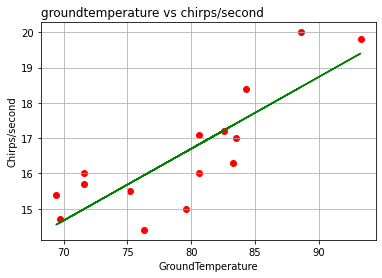

In [46]:
plt.scatter(x, y, color='red')
plt.plot(x, linreg.predict(x), color='green')
plt.xlabel("GroundTemperature")
plt.ylabel("Chirps/second")
plt.title("groundtemperature vs chirps/second",loc='left')
plt.grid()
plt.show()

In [23]:
print('r-squared: ', linreg.score(x, y))

r-squared:  0.6922946529146998


In [30]:
linreg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

In [55]:
approx_morning_Temp=(18 - linreg.intercept_) / linreg.coef_
print("the approximate morning temperature is :",approx_morning_Temp)

the approximate morning temperature is : [86.40743135]
